# <font  color = "#0093AF"> $T_1$ limits

## SETUP

In [2]:
# SETUP SLEEPY
import os
os.chdir('../../../')

In [15]:
import SLEEPY as sl
import numpy as np
import matplotlib.pyplot as plt
import pyDR

## Build the system

In [58]:
# By default, we get a powder average when including anisotropic terms.
# However, we don't need it for mimicking tumbling, 
# so we set it explicitly to a 1-element powder average
ex0=sl.ExpSys(v0H=400,Nucs=['15N','1H'],vr=0,LF=True,pwdavg='bcr10')
delta=sl.Tools.dipole_coupling(.102,'1H','15N')
ex0.set_inter('dipole',i0=0,i1=1,delta=22954.8)

# Set up 4-site motion
kex,ex=sl.Tools.SetupTetraHop(ex0,tc=1e-9) #Defaults to the magic angle, which will average the couplings

L=sl.Liouvillian(*ex,kex=kex)
L.add_relax('DynamicRecovery')
seq=L.Sequence(Dt=.1)

In [59]:
tc0=np.logspace(-6,-12,20)
rho=sl.Rho('15Nz','15Nz')
R1=[]
for tc in tc0:
    L.kex=sl.Tools.fourSite_sym(tc=tc)
    R1.append(rho.extract_decay_rates(seq))

<IPython.core.display.Javascript object>


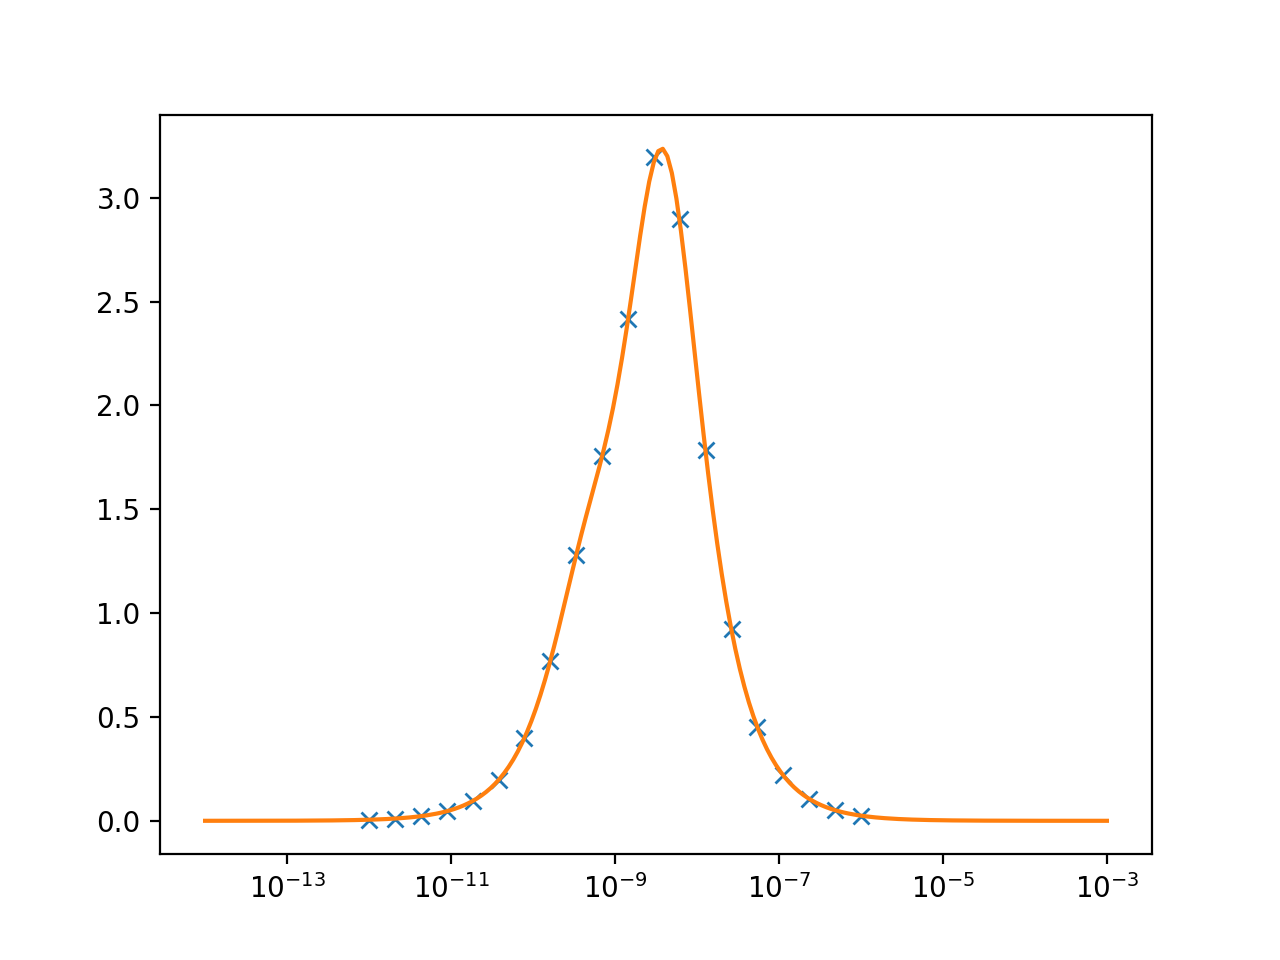

In [60]:
ax=plt.subplots()[1]
ax.semilogx(tc0,R1,marker='x',linestyle='')
nmr=pyDR.Sens.NMR(v0=400,Nuc='15N',CSA=0,Type='R1')
ax.semilogx(nmr.tc,nmr.rhoz.T)

In [61]:
rho=sl.Rho('Thermal','15Nz')
rho.DetProp(seq,n=1000)

Density Matrix/Detection Operator
rho0: Thermal
detect[0]: 15Nz
Current time is 100000000.000 microseconds
1000 time points have been recorded


<IPython.core.display.Javascript object>


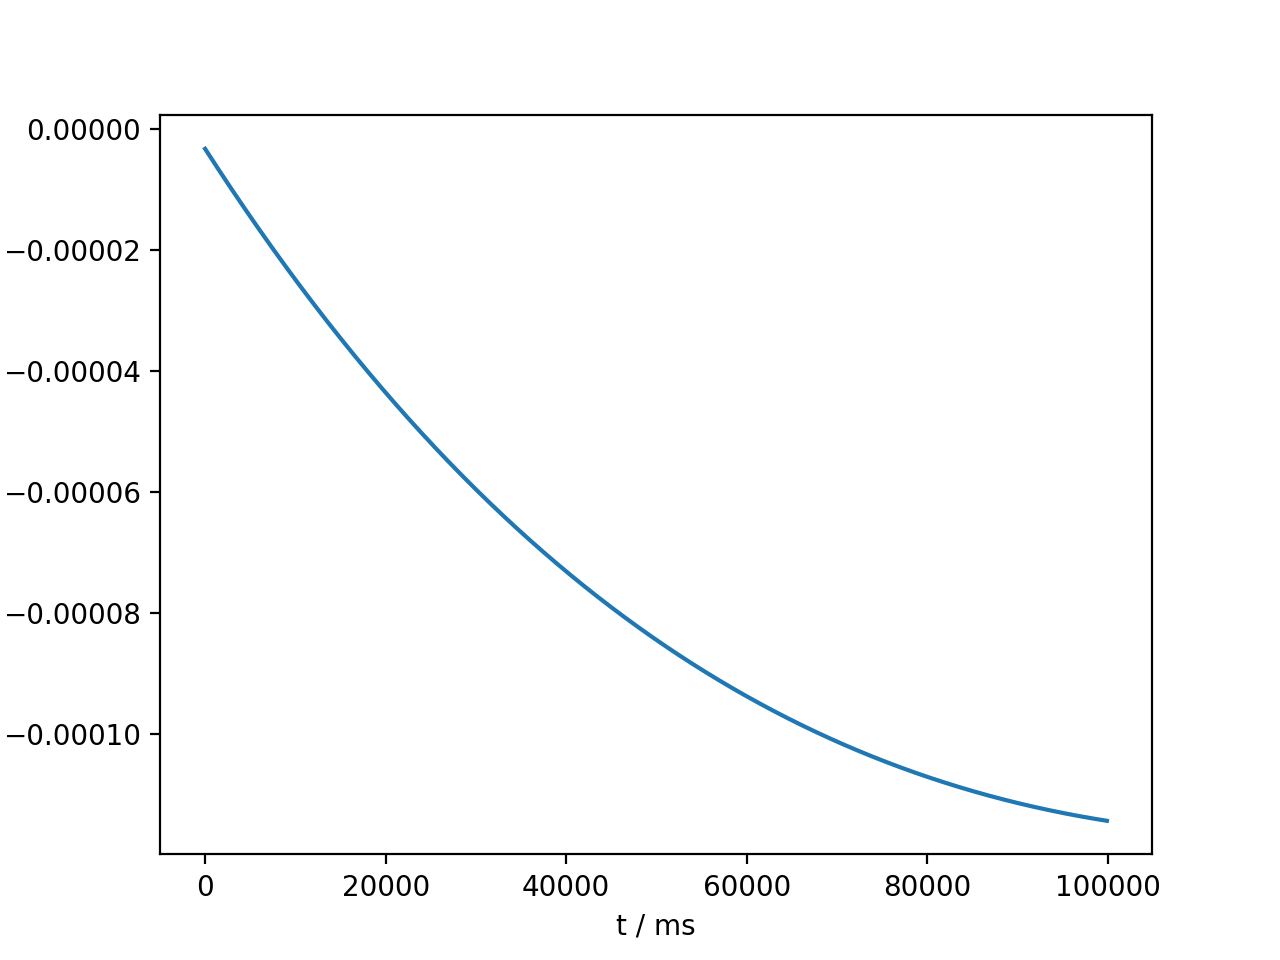

<AxesSubplot:xlabel='t / ms', ylabel='<$^{15}N_z$>'>

In [62]:
rho.plot()